In [257]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [258]:
UNSUPERVISED = 'DATASET_IKAN_tanpa_label.xlsx'
df = pd.read_excel(UNSUPERVISED)

In [259]:
kolom_numerik = [
    'Usia_Mesin_Bulan',
    'Jam_Operasi_Harian',
    'Beban_Muatan_Kg',
    'Suhu_Eksternal_C',
    'Getaran_Mesin_Hz'
]

In [260]:
for kolom in kolom_numerik:
    df[kolom] = df[kolom].replace(',', '.', regex=True).astype(float)

In [261]:
skaler = StandardScaler()
data_distandarkan = skaler.fit_transform(df[kolom_numerik])

In [262]:
KMeans = KMeans(n_clusters = 2, random_state=42)
KMeans.fit(data_distandarkan)
df['cluster'] = KMeans.labels_ 

c:\praktikum 2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


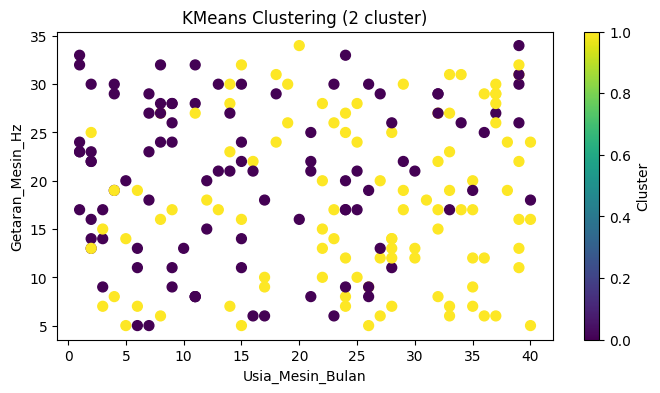

   Usia_Mesin_Bulan  Jam_Operasi_Harian  Beban_Muatan_Kg  Suhu_Eksternal_C  \
0              15.0                23.0            406.0              30.0   
1              15.0                14.0            474.0              35.0   
2              40.0                24.0            378.0              33.0   
3              14.0                17.0            283.0              38.0   
4              33.0                18.0            274.0              31.0   

   Getaran_Mesin_Hz  cluster  
0               5.0        1  
1              24.0        0  
2               5.0        1  
3              21.0        0  
4              19.0        1  


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(df['Usia_Mesin_Bulan'], df['Getaran_Mesin_Hz'], c=df['cluster'], s=50, cmap='viridis')
plt.xlabel('Usia_Mesin_Bulan')
plt.ylabel('Getaran_Mesin_Hz')
plt.title('KMeans Clustering (2 cluster)')
plt.colorbar(label='Cluster')
plt.show()

df.to_excel('Hasil clustering.xlsx')
print(df.head()     )

In [264]:
df = pd.read_excel('Hasil clustering.xlsx')
df

,Unnamed: 0,Usia_Mesin_Bulan,Jam_Operasi_Harian,Beban_Muatan_Kg,Suhu_Eksternal_C,Getaran_Mesin_Hz,cluster
0,0,15,23,406,30,5,1
1,1,15,14,474,35,24,0
2,2,40,24,378,33,5,1
3,3,14,17,283,38,21,0
4,4,33,18,274,31,19,1
...,...,...,...,...,...,...,...
195,195,32,22,417,29,22,1
196,196,34,16,234,36,17,1
197,197,37,24,267,28,30,1
198,198,39,24,293,36,32,1


In [265]:
x = df.iloc[:, 1:5]
y = df.iloc[:, 6]

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [268]:
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42, k_neighbors=1)  
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [269]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [270]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)

accuracy = model.score(x_test, y_test)
report = classification_report(y_test, y_pred, zero_division=1)


In [271]:
print('Accuracy: ', accuracy)
print('Classification Report:\n', report)

Accuracy:  0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.94      0.94      0.94        18

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [272]:
label_map = {1: 'optimal', 0: 'perawatan_diperlukan'}

In [273]:
file_path = 'hasil prediksi naibe bayes.xlsx'
result = pd.DataFrame(y_pred, columns=['cluster'])
result.to_excel(file_path, index=False)
print('Hasil prediksi disimpan di ', file_path)

Hasil prediksi disimpan di  hasil prediksi naibe bayes.xlsx


In [274]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [275]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

In [276]:
print('Accuracy: ', accuracy)
print('Classification Report:\n', report)

Accuracy:  0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [277]:
label_map = {1: 'optimal', 0: 'perawatan_diperlukan'}
print('Label Map:', label_map)

result = pd.DataFrame(y_pred, columns=['cluster'])

file_path = 'Hasil prediksi SVM.xlsx'
result.to_excel(file_path, index=False)

print('Hasil prediksi disimpan di ', file_path)

Label Map: {1: 'optimal', 0: 'perawatan_diperlukan'}
Hasil prediksi disimpan di  Hasil prediksi SVM.xlsx


In [278]:
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [279]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

In [280]:
print('Accuracy: ', accuracy)
print('Classification Report:\n', report)

Accuracy:  0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.94      0.94      0.94        18

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

